# <center>CP321 Final Project: Post Secondary Education Enrollment</center>
### <center>Diya Mistry, 169033002</center>
### <center>Janaki Patel, 169037500</center> 
### <center>Sufiya Rahemtulla, 169018559</center> 
### <center>April 25th, 2024</center> 

<center><h2 style="color:red; font-weight:bold;">Proposal Question: What are current trends in university enrollment and what factors might affect these decisions? </h2></center>

Canada carries many universities offering a wide variety of programs, particularly in Ontario. Understanding the dynamics behind university enrollment requires delving into multifaceted factors that influence students' decisions. In our research project, we embarked on a comprehensive analysis to discern the current trends in university enrollment and the intricate determinants shaping these choices. Using datasets provided by the Canadian government, we charted the enrollment trends of various programs across the years. Our investigation extended beyond numbers, going into the employment rates post-graduation for different programs and the demographic profiles of applicants. To effectively communicate our findings, we employed a suite of visualization techniques, ranging from comparative bar graphs spotlighting enrollment disparities among universities to dynamic time series plots unveiling trends over time.  By scrutinizing employment prospects and demographic compositions, we deciphered the underlying reasons behind these fluctuations, shedding light on the factors influencing students' enrollment decisions. Our findings not only highlight the current trends in university enrollment but also offer different perspectives on the wide array of factors guiding students' choices. By studying the connection between program offerings, employment opportunities, and student demographics, we provide a holistic understanding of the dynamics steering enrollment patterns in Canadian universities. 

## Visualization 1: Enrollement by Gender in Ontario Universities
This visualization examines male and female enrollment in Ontario universities for the 2021-2022 academic year. Using the "University", "Gender", and "2021-2022 Undergrad" columns of the "Gender" dataset, it was manipulated and then visualized with a stacked bar chart. The analysis indicates that, with exceptions of Waterloo University and Ontario Tech, female enrollment exceeds male enrollment across most universities. Notably, smaller universities tend to have a higher proportion of female students, while larger universities exhibit a more balanced distribution between genders.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.colors as mcolors

C:\Users\dbob7\AppData\Local\Temp\ipykernel_7928\1321534873.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


         University Female Enrollment 2021-2022 Male Enrollment 2021-2022
0            Algoma                        1247                      1186
1             Brock                        8503                      6377
2          Carleton                       10422                      9873
3            Guelph                       14020                      8801
4            Hearst                         122                        91
5          Lakehead                        3289                      2246
6        Laurentian                        3346                      1971
7          McMaster                       17159                     13574
8      Metropolitan                       17996                     13445
9             NOSMU                         285                       160
10        Nipissing                        2596                      1137
11            OCADU                        2775                      1072
12     Ontario Tech                   

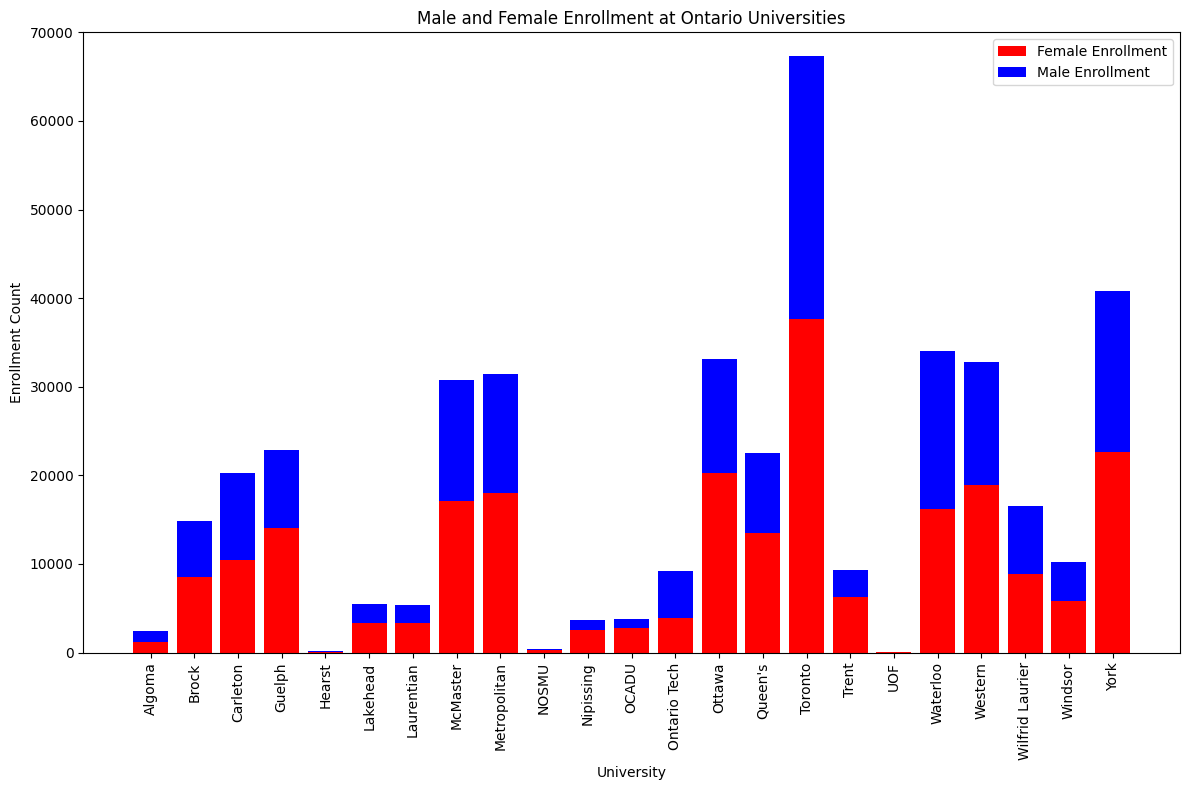

In [41]:

gender_df = pd.read_csv('gender.csv')

gender_df = gender_df.iloc[:, [0, 1, 20]]
gender_df = gender_df.iloc[1:]
gender_df.columns = ['University', 'Gender','2021-2022 Undergrad']
gender_df = gender_df[(gender_df['Gender'] == 'Male') | (gender_df['Gender'] == 'Female')]
gender_df.replace('-', np.nan, inplace=True)
gender_df = gender_df.dropna(subset=[ '2021-2022 Undergrad'])
#print(gender_df)

reshaped_df = gender_df.pivot(index='University', columns='Gender', values='2021-2022 Undergrad').reset_index()
reshaped_df.columns.name = None
reshaped_df.columns = ['University', 'Female Enrollment 2021-2022', 'Male Enrollment 2021-2022']
print(reshaped_df)

data = {
    'University': ['Algoma', 'Brock', 'Carleton', 'Guelph', 'Hearst', 'Lakehead', 'Laurentian', 'McMaster', 'Metropolitan', 'NOSMU', 'Nipissing', 'OCADU', 'Ontario Tech', 'Ottawa', 'Queen\'s', 'Toronto', 'Trent', 'UOF', 'Waterloo', 'Western', 'Wilfrid Laurier', 'Windsor', 'York'],
    'Female Enrollment 2021-2022': [1247, 8503, 10422, 14020, 122, 3289, 3346, 17159, 17996, 285, 2596, 2775, 3900, 20274, 13458, 37695, 6243, 14, 16166, 18918, 8921, 5855, 22675],
    'Male Enrollment 2021-2022': [1186, 6377, 9873, 8801, 91, 2246, 1971, 13574, 13445, 160, 1137, 1072, 5323, 12822, 9022, 29581, 3049, 13, 17903, 13864, 7618, 4382, 18127]
}

reshaped_df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(12, 8))
max_enrollment = max(reshaped_df['Female Enrollment 2021-2022'].max(), reshaped_df['Male Enrollment 2021-2022'].max())
ax.bar(reshaped_df['University'], reshaped_df['Female Enrollment 2021-2022'], label='Female Enrollment', color='red')
ax.bar(reshaped_df['University'], reshaped_df['Male Enrollment 2021-2022'], bottom=reshaped_df['Female Enrollment 2021-2022'], label='Male Enrollment', color='blue')
ax.set_xlabel('University')
ax.set_ylabel('Enrollment Count')
ax.set_title('Male and Female Enrollment at Ontario Universities')
ax.legend()
ax.set_ylim(0, 70000)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Visualization 2: Total Enrollment by City in Relation to Campus Count
This visualization explores the correlation between total enrollment in 2021-2022 and the number of campuses in cities in Ontario, and determines if having a higher number of campuses in a city is an underlying factor of a higher total enrollment in that repsective city. Relevant columns from the "Campus" sheet of the dataset were extracted including "University", "Campus", and "2021-2022 Enrollment", while a new column is generated to identify the city associated with each campus. The resultant dataframe aggregates data by city, indicating the count of campuses and the total enrollment across universities within each city. Visualization is presented through a scatter plot, with cities and total enrollment plotted along the axes. Data points are color-coded to represent the number of campuses in each city. Analysis highlights cities with highest enrollment are Toronto, Waterloo, and Ottawa. The visualization also suggests that cities with more campuses tend to have higher total enrollment proving a corelation. 

C:\Users\dbob7\AppData\Local\Temp\ipykernel_7928\602935438.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  campus_df = campus_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


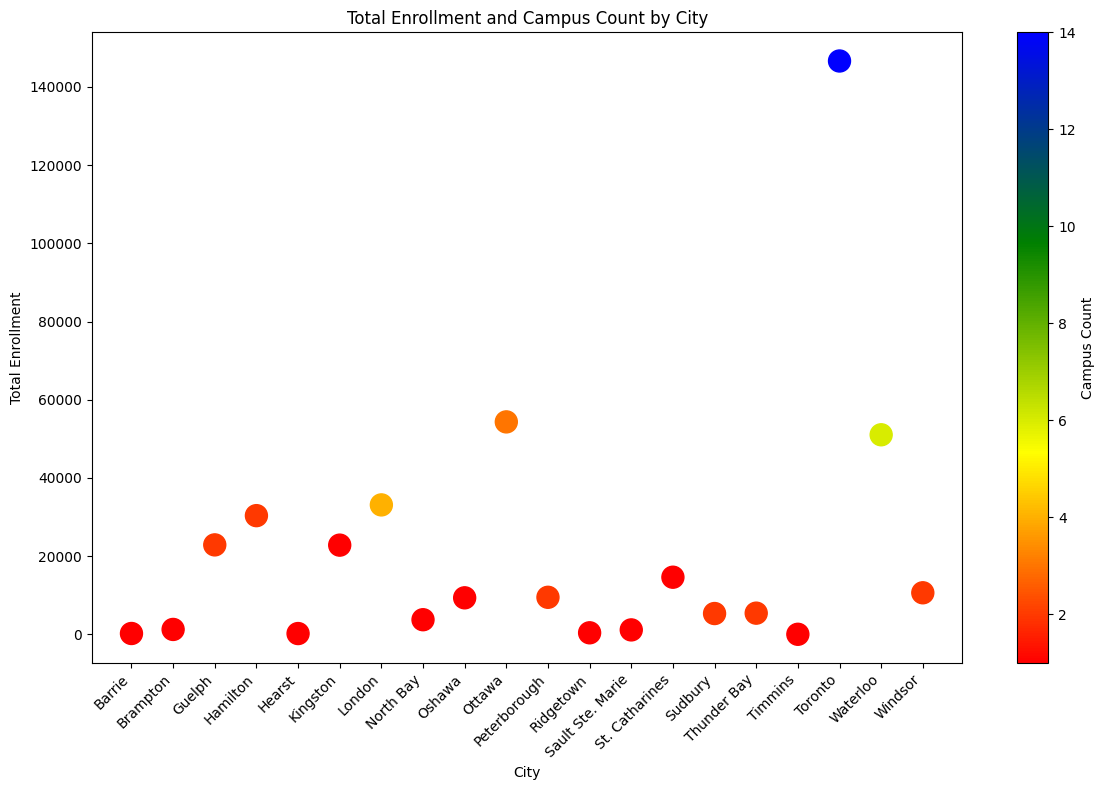

In [42]:

campus_df = pd.read_csv('campus.csv', encoding='latin1')
campus_df = campus_df.iloc[:, [0, 1, 20]]
campus_df = campus_df.iloc[3:]
campus_df.columns = ['University', 'Campus', '2021-2022 Undergrad']
campus_df = campus_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
campus_df = campus_df[~campus_df.isin(['-']).any(axis=1)]
campus_df.replace('NA', np.nan, inplace=True)
campus_df = campus_df.dropna(subset=['2021-2022 Undergrad'])
#print(campus_df)

def extract_city(campus_name):
    # Define city mappings
    city_mappings = {
        'Brampton': ['Brampton'],
        'Timmins': ['Timmins'],
        'Hamilton': ['Hamilton', 'McMaster University'],
        'Toronto': ['Toronto', 'Ontario College of Art & Design', 'Ottawa  - Toronto(Glendon) campus', 'Emmanuel College', 'Regis College', "St. Augustine's College", 'Trinity College (Theology only)', 'University of Toronto  (includes federated Arts Colleges)', 'Wycliffe College', 'Glendon College', 'York (Off-shore)', 'York University'],
        'Mississauga': ['University of Toronto Mississauga (formerly Erindale College)'],
        'Waterloo': ['Cambridge - School of Architecture', 'Kitchener - Pharmacy', 'Stratford - Digital Media', 'University of Waterloo', 'Wilfrid Laurier University'],
        'Windsor': ['Ottawa -  Windsor campus', 'University of Windsor'],
        'Sudbury': ['Sudbury', 'Laurentian University'],
        'Barrie': ['Barrie', 'Lakehead - Georgian'],
        'Thunder Bay': ['Thunder Bay', 'Lakehead University'],
        'Ottawa': ['Ottawa', 'Carleton University', "Université d'Ottawa", "Université Saint-Paul",  ],
        'North Bay': ['North Bay', 'Nipissing University'],
        'Kingston': ["Queen's University"],
        'Peterborough': ['Trent University'],
        'Sault Ste. Marie': ['Algoma University', 'Sault Ste. Marie'],
        'St. Catharines': ['Brock University', 'St. Catharines'],
        'Guelph': ['University of Guelph', 'Guelph'],
        'Humber': ['University of Guelph - Humber Campus'],
        'Orillia': ['Lakehead University - Orillia Campus'],
        'Hearst': ['Université de Hearst'],
        'Scarborough': ["University of Toronto Scarborough (formerly Scarborough College)"],
        'Mississauga': ['University of Toronto Mississauga'],
        'Brantford': ['Wilfrid Laurier University - Brantford Campus'],
        'York': ['Glendon College', 'York University'],
        'Ridgetown': ['Ridgetown College'],
        'Oshawa': ['University of Ontario Institute of Technology', 'Trent University Durham GTA'],
        'London': ["Brescia University College", "Huron University College", "King's University College", "University of Western Ontario"]
    }
    for city, patterns in city_mappings.items():
        for pattern in patterns:
            if pattern.lower() in campus_name.lower():
                return city
    return None

campus_df['City'] = campus_df['Campus'].apply(extract_city)
#print(campus_df)

city_university_count = campus_df.groupby('City').size().reset_index(name='Campus Count')
campus_df['2021-2022 Undergrad'] = campus_df['2021-2022 Undergrad'].astype(str).str.replace(',', '')
campus_df['2021-2022 Undergrad'] = campus_df['2021-2022 Undergrad'].astype(float)
city_enrollment_sum = campus_df.groupby('City')['2021-2022 Undergrad'].sum().reset_index(name='Total Enrollment')
city_enrollment_sum['Total Enrollment'] = city_enrollment_sum['Total Enrollment'].astype(int)
city_stats = city_university_count.merge(city_enrollment_sum, on='City')
#print(city_stats)

cities = city_stats['City']
total_enrollment = city_stats['Total Enrollment'].astype(float)  
campus_count = city_stats['Campus Count'].astype(int)  
colors = ['red', 'yellow', 'green', 'blue']
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(cities, total_enrollment, c=campus_count, cmap=custom_cmap, s=250)
cbar = plt.colorbar(scatter)
cbar.set_label('Campus Count')
plt.xlabel('City')
plt.ylabel('Total Enrollment')
plt.title('Total Enrollment and Campus Count by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualization 3: Enrollment by University and Most Popular Program


This visualization sheds light on the most sought-after programs across various universities during the timeframe of 2021-2022, highlighting the enrollment figures for these programs. Initially, the dataset was filtered to focus solely on the "Program," "Enrollment 2021-2022," and "University" columns. Subsequently, the maximum enrollment count and corresponding program for each university were extracted. The resulting data is portrayed in a bar chart, offering a visual depiction of the prevalence of similar programs. Programs not repeated are depicted in sky blue those under the categories of Bachelor of Business/Commerce in purple and those in Bachelor of Arts are depicted in blue, thereby elucidating the frequency of the most popular programs falling under these academic streams across different institutions. This visualization also underscores the disparities in enrollment across universities, as larger institutions may boast the same maximum enrollment figures for their most sought-after programs as some of their smaller counterparts. By presenting this information graphically, the visualization facilitates a comprehensive understanding of enrollment dynamics, revealing not only the prevailing trends in program selection but also the varying degrees of enrollment across universities and their respective programs.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Patch 

file_path1 = 'Book1 programs.csv'
df = pd.read_csv(file_path1, skiprows=2, encoding='latin1')

C:\Users\dbob7\AppData\Local\Temp\ipykernel_7928\2593824486.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  program_df['Enrollment 2021-2022'].replace('-', np.nan, inplace=True)


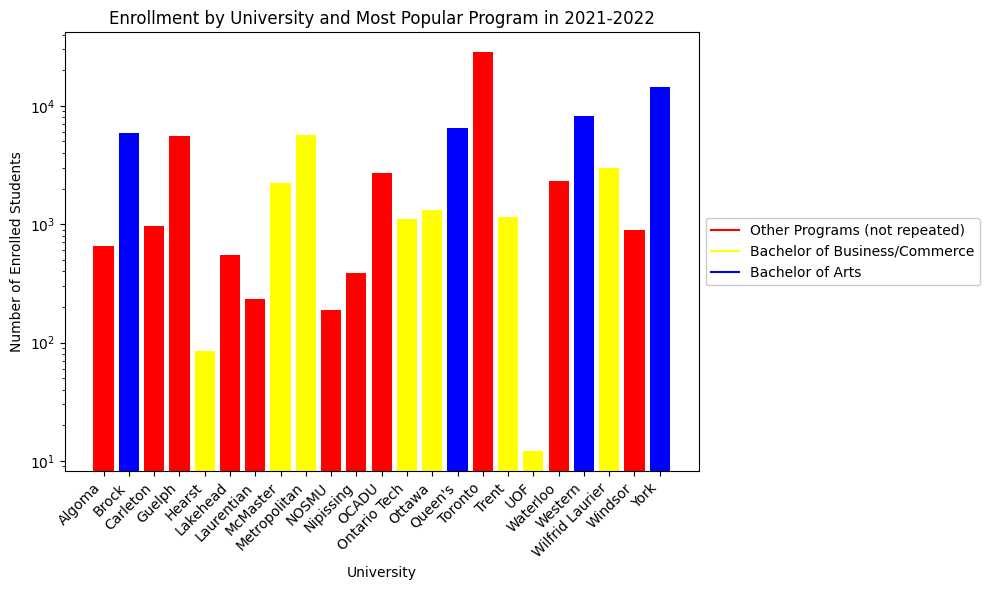

In [40]:
program_df = df.iloc[:, [0, 1, 20]]
program_df = program_df.iloc[1:]

# Rename columns for clarity
program_df.columns = ['University', 'Program', 'Enrollment 2021-2022']

# Filter rows based on the program name
program_df['Enrollment 2021-2022'].replace('-', np.nan, inplace=True)
program_df = program_df.dropna()
program_df['Enrollment 2021-2022'] = pd.to_numeric(program_df['Enrollment 2021-2022'], errors='coerce')


max_enrollment_indices = program_df.groupby('University')['Enrollment 2021-2022'].idxmax()
max_enrollment_rows = program_df.loc[max_enrollment_indices]


colors = {'Graduate Certificate in Project Management': 'red', 
          'Bachelor of Arts': 'blue', 
          'Psychology': 'red', 
          'Bachelor of Science': 'red', 
          'B.A.A. (Hearst)': 'yellow', 
          'BED2PJ': 'red', 
          'Architectural Studies': 'red', 
          'Bachelor of Commerce': 'yellow', 
          'Business Management': 'yellow', 
          'MR': 'red', 
          'Bachelor of Education - Primary/Junior': 'red', 
          'Bachelor of Design': 'red', 
          'Hon BCom K Finance': 'yellow', 
          'Bachelor of Arts (Hons.)': 'blue', 
          'SCIENCE': 'red', 
          'Bachelor of Business Administration': 'yellow', 
          "Baccalauréat spécialisé en études de l'économie et l'innovation sociale": 'yellow', 
          'Computer Science, BCS HC': 'red', 
          'Honours Bachelor of Business Administration Business Administration': 'yellow', 
          'Bachelor of Science in Nursing (Honours) - Collaborative Nursing': 'red', 
          'Bachelor of Arts Honours': 'blue'}

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(max_enrollment_rows['University'], max_enrollment_rows['Enrollment 2021-2022'],
               color=[colors.get(program, 'gray') for program in max_enrollment_rows['Program']])
plt.xlabel('University')
plt.ylabel('Number of Enrolled Students')
plt.title('Enrollment by University and Most Popular Program in 2021-2022')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')

# Adding a legend for major colors
legend_labels = {
    'Other Programs (not repeated)': 'red',
    'Bachelor of Business/Commerce': 'yellow',
    'Bachelor of Arts': 'blue'
}
for label, color in legend_labels.items():
    plt.plot([], [], color=color, label=label)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, framealpha=1)

plt.tight_layout()
plt.show()

## Visualization 4: Enrollment Trends Over Time

This visualization delves into the trends in program enrollment across the years, focusing on what emerged as the four most prominent programs across various universities. Notably, these programs are University of Toronto's Science program, Western's Bachelor of Arts, York's Bachelor of Arts Honours, and Queen's Bachelor of Arts (Hons.), as discerned from the initial visualization. Filtering the data to isolate the enrollment figures for these four programs, I generated a graph to illustrate the enrollment trajectories of each. Through these visualizations, we gain insight into the nuanced patterns characterizing each program's enrollment trends. Observations reveal University of Toronto's Science program experiencing a consistent upward trajectory over the years, with minor fluctuations except for a noticeable change from 2014 to 2015. Similarly, Queen's Bachelor of Arts program exhibits a steady increase, albeit with occasional minor fluctuations. In contrast, Western's Bachelor of Arts program demonstrates considerable volatility, peaking in 2012 before undergoing a significant decline until 2015. Subsequently, it shows sporadic spikes and drops, particularly evident in the years 2021-2022. Distinctively diverging from the others, York's Bachelor of Arts program showcases a declining enrollment trend, notably diminishing from 2012 to 2017 and showing only marginal recovery since then. The observed trends likely stem from multifaceted factors, including university policies regarding admission quotas, academic performance criteria for acceptance, and shifts in student preferences. Understanding these dynamics provides valuable insights into the broader landscape of program enrollment across universities.

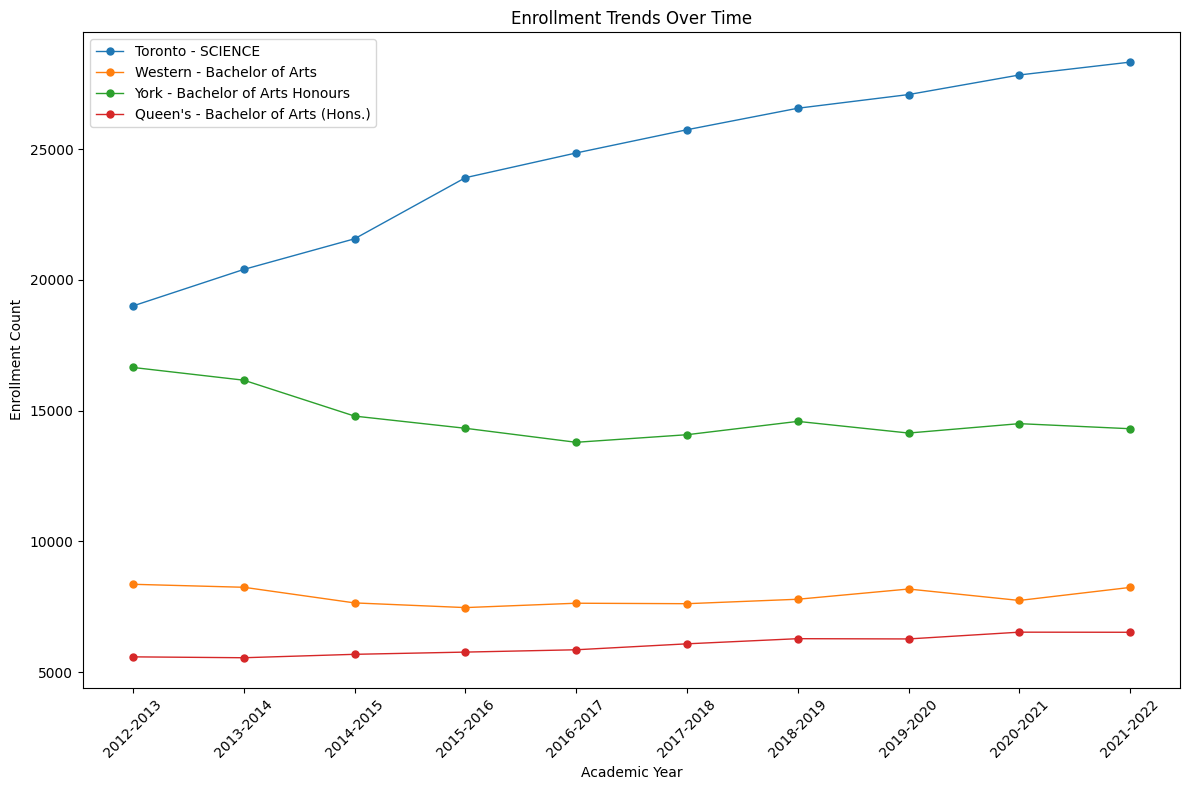

In [19]:
trends_df = df.iloc[:, [0, 1]]
trends_df = df.iloc[1:]


# Filter the DataFrame to include only the rows with the specified indices and columns
indices_to_filter = [17369, 19174, 23320, 17019]
trends_df = trends_df.loc[indices_to_filter]

numeric_cols = trends_df.columns.difference(['HEADCOUNT - FALL', 'Unnamed: 1'])
trends_df[numeric_cols] = trends_df[numeric_cols].apply(pd.to_numeric, errors='coerce')
trends_df = trends_df.dropna(axis=1, how='all')

trends = df.dropna(axis=1, how='all')
# Filter out columns with dashes in all rows



#plot
plt.figure(figsize=(12, 8))  # Adjust figsize as needed

# Iterate through each row in the DataFrame
for index, row in trends_df.iterrows():
    # Get x and y data
    years = trends_df.columns[2:]  # Assuming columns are individual years
    enrollments = row[2:]
    
    # Plot the data for the current row
    plt.plot(years, enrollments, marker='o', markersize=5, label=row['HEADCOUNT - FALL'] + ' - ' + row['Unnamed: 1'], linewidth=1)

# Set labels and title
plt.title('Enrollment Trends Over Time')
plt.xlabel('Academic Year')
plt.ylabel('Enrollment Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



# Labour Force Estimates by Education

The [2020 Labour force estimates by education](https://data.ontario.ca/dataset/labour-force-estimates-by-education/resource/de1d8a25-5c3c-4cf9-bd79-21169f886611) dataset provides 2020 labour force statistics in regions across Canada. It consists of the following 8 columns:

- Timeseries: Timestamps representing the date at which the statistic was recorded. 
- Prov: Region/province associated with each observations. 
- Age: Age groups associated with each observation (15+,15-24,25-54,25+,25-64,25-34,55+ and 55-64). 
- Education: Education level associated with each observation; randing from elementary(0-8 years) to Above Bachelor's degree.
- CHAR: Type of labour estimate (population, labour force, employed (full time, part time), unemployed, not in labour force, unemployment rate, participation rate, employment rate)
- Total: Total labour estimates. 
- Male: Male labour estimates.
- Women: Female labour estimates.

For the following visualizations, the Timeseries, Prov, Age, Education, CHAR, and Total columns will be used. The Prov column will be filtered to focus on Ontario data. Education will cover No post secondary education ('No PSE  (0,1,2,3,4)'), Trade certificate, College diploma, Certificate or diploma below bachelors degree, Bachelor degree, Above Bachelor's degree. CHAR will cover employment and unemployment rate. Finally, all estimates will be based on total estimates (not separated by male and female). .

In [26]:
df = pd.read_csv('data-2020.csv')
ontario = df[(df['Prov'] == 'Ontario') & (df['Age'] == 'Total')]
education = ontario['Education'].unique()
stat = ontario['CHAR'].unique()
desired_education = [
    '  No PSE  (0,1,2,3,4)',
    '     Trade certificate, (5)',
    '     College diploma, (6) ',
    '     Certificate or diploma below bachelors degree, (7)',
    '     Bachelor degree (8)',
    '     Above Bachelor\'s degree (9)" '
]

filtered = ontario[ontario['Education'].isin(desired_education)]

## Visualization 5: Employment Rate
This visualization observes total employment rate estimates in Ontario for individuals with the following education levels.

- No post secondary education
- Trade certificate
- College diploma
- Certificate or diploma below bachelors degree
- Bachelor degree
- Above Bachelor's degree

Based on the below visualization, it is evident that a higher level of education offers higher chances at employment. In this case, the highest level of education provides the highest rate of employment at above 70%. Similarly, individuals with no post secondary education have more difficulty, with employment rate of around 40-45%. 

C:\Users\dbob7\AppData\Local\Temp\ipykernel_7928\323413227.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_data.index = pd.to_datetime(monthly_data.index)


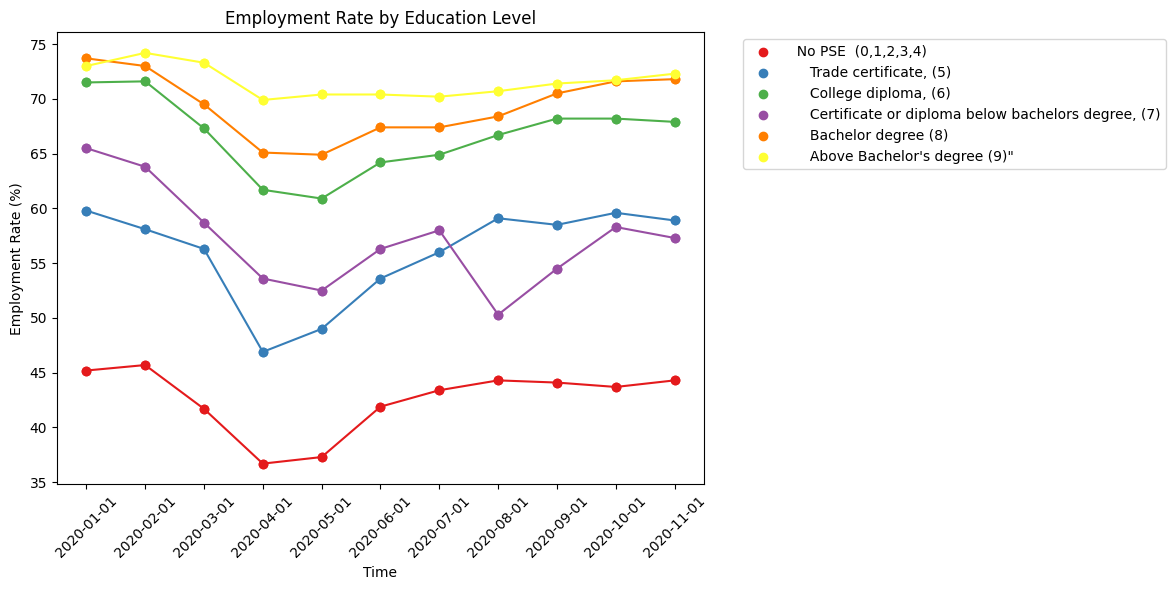

In [29]:
#employment rate

education_levels = filtered['Education'].unique()
monthly_data = filtered[filtered['CHAR'] == 'Employment rate'].groupby(['Timeseries', 'Education'])['Total'].mean().unstack()

monthly_data.index = pd.to_datetime(monthly_data.index)
monthly_data = monthly_data.sort_index()

plt.figure(figsize=(12, 6))
index = np.arange(len(monthly_data.index))

for i, edu_level in enumerate(education_levels):
    color = plt.cm.Set1(i % 10) 
    plt.scatter(index, monthly_data[edu_level], label=edu_level, color=color)
    plt.plot(index, monthly_data[edu_level], marker='o', linestyle='-', color=color, label=None)

plt.xlabel("Time")
plt.ylabel("Employment Rate (%)")
plt.title("Employment Rate by Education Level")

formatted_dates = monthly_data.index.strftime('%Y-%m-%d')
plt.xticks(index, formatted_dates, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

# Visualization 6: Unemployment Rate

This visualization observes total unemployment rate estimates in Ontario for individuals with the same education levels as those in the above visualization. Based on the below visualization, it is evident that a higher level of education offers lower chances at unemployment. In this case, the lowest level of education provides the highest rate of unemployment going up to 20%. Similarly, the highest level of education has an unemployment rate of below 10%.  40-45%.

C:\Users\dbob7\AppData\Local\Temp\ipykernel_7928\3520961763.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_data.index = pd.to_datetime(monthly_data.index)


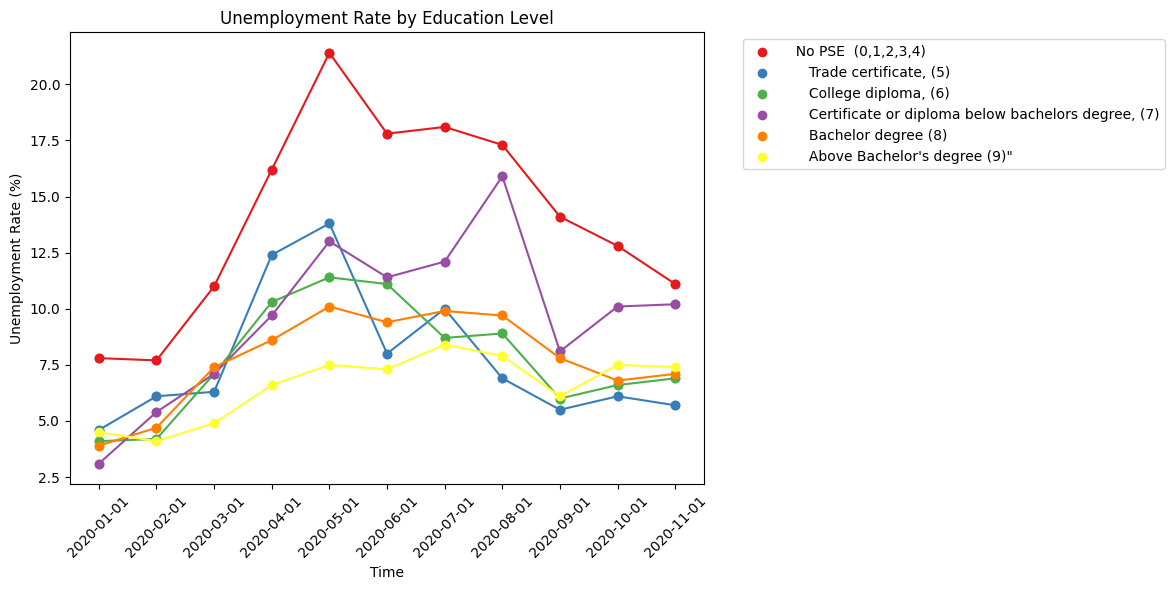

In [30]:
#unemployment rate

education_levels = filtered['Education'].unique()
monthly_data = filtered[filtered['CHAR'] == 'Unemployment rate'].groupby(['Timeseries', 'Education'])['Total'].mean().unstack()

monthly_data.index = pd.to_datetime(monthly_data.index)
monthly_data = monthly_data.sort_index()

plt.figure(figsize=(12, 6))
index = np.arange(len(monthly_data.index))

for i, edu_level in enumerate(education_levels):
    color = plt.cm.Set1(i % 10) 
    plt.scatter(index, monthly_data[edu_level], label=edu_level, color=color)
    plt.plot(index, monthly_data[edu_level], marker='o', linestyle='-', color=color, label=None)

plt.xlabel("Time")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate by Education Level")

formatted_dates = monthly_data.index.strftime('%Y-%m-%d')
plt.xticks(index, formatted_dates, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Conclusion
In summary, our comprehensive analysis has described numerous  trends within post-secondary enrollment while exploring several potential determinants influencing students' decisions. It has come to light that female enrollment predominates over male enrollment across the majority of universities, with the size of institutions potentially contributing to this phenomenon, evident in the tendency for smaller universities to exhibit a higher proportion of female students. Furthermore, our investigation has underscored the prominence of specific geographical locations such as Toronto, Waterloo, and Ottawa, wherein a noteworthy concentration of students is observed. Notably, the number of campuses within these locales emerges as a significant underlying factor, revealing a positive correlation between total enrollment and the quantity of university campuses within a given city. 

Moreover, our study has confirmed the positive relationship between higher levels of education and heightened employment prospects compareded against the challenge faced by individuals with lesser educational attainment in securing employment. Nonetheless, a noteworthy trend has emerged from our time series visualization, indicating an slight increase in employment rates among individuals with lower education levels in recent years, suggesting a plausible correlation with declining university enrollment over the same period. . 

Additionally, our examination of program preferences has revealed a pronounced inclination among students towards Business/Commerce and Arts programs. Specifically, our findings highlight the University of Toronto as the leading institution for Science programs, exhibiting remarkable growth. Conversely, institutions such as Western, York, and Queens excel in Arts programs, with York registering the highest enrollment albeit displaying a gradual decline over time. 

In conclusion, our analysis highlights the intricate interplay between factors such as gender distribution, university size and location, educational attainment, and program popularity in shaping post-secondary enrollment trends, providing valuable insights into the evolving landscape of higher education decision-making among students. 